# Mistaken Mice notebook

2020 NMA academy project, mistaken mice group, pod 173 antique cicada

# Import packages and functions

In [30]:
# to import the functions we wrote, clone the git repo
!git clone https://github.com/jorgeerrz/mistaken_mice.git
%cd mistaken_mice
#alternatively, run the notebook locally, then just comment the lines above

from filter import *
from summarise_dataset import *
from PCA_fun import neurons_PCA
from GLM import *

%load_ext autoreload
%autoreload 2

Cloning into 'mistaken_mice'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 168 (delta 92), reused 117 (delta 48), pack-reused 0
Receiving objects: 100% (168/168), 805.36 KiB | 8.57 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/mistaken_mice/mistaken_mice/mistaken_mice
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading of Steinmetz data

In [4]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)


In [5]:
# skip if you already downloaded the data
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [6]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))


# Filter the data

In [8]:
# need to loop over all sessions to pass as input to summarise_data function in next step
first_session_filtered_VISp = filter_spikes(alldat,0,'VISp') 
first_session_filtered = filter_spikes(alldat,0) 
print(np.shape(first_session_filtered['spks']))

(734, 10, 250)


# Summarise the filtered data

{'n_neurons': array([ 734., 1070.,  619., 1769., 1077., 1169.,  584., 1156.,  788.,
        1172.,  857.,  698.,  983.,  756.,  743.,  474.,  565., 1089.,
         606.,  899.,  578.,  646., 1268., 1337.,  885., 1056.,  563.,
         549.,  750.,  942.,  977.,  522.,  613.,  781.,  795.,  680.,
        1055.,  805., 1348.]),
 'n_timebins': array([250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250., 250., 250., 250., 250., 250.,
        250., 250., 250., 250., 250., 250.]),
 'n_trials': array([214., 251., 228., 249., 254., 290., 252., 250., 372., 447., 342.,
        340., 300., 268., 404., 280., 224., 316., 247., 235., 124., 444.,
        151., 187., 261., 178., 253., 142., 128., 143., 237., 260., 191.,
        296., 311., 258., 181., 199., 343.])}

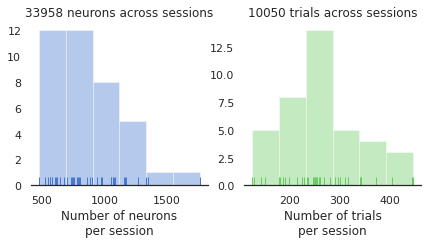

In [9]:
summarise_dataset(alldat) # should be filtered data, but alldat is used here as an example


# Change the time bin
Optional step

In [10]:
dat = first_session_filtered
NT = dat['spks'].shape[-1]
minT = 50
maxT = 130
NN = dat['spks'].shape[0]

droll = np.reshape(dat['spks'][:,:,minT:maxT], (NN,-1))

dat['spks'][:,:,minT:maxT].mean(axis=2).shape


(734, 10)

# Principal Component Analysis
For now, just one session

{'PCrange': 5,
 'PCs': array([[-0.6933264 , -0.68185069, -0.94384717, -0.64309338, -0.77919715,
         -0.43343423, -0.67401202,  0.83704949, -0.03409961, -0.41338933],
        [ 0.40231723, -0.42495241, -0.33177122, -0.52369332,  0.0400932 ,
          0.27409485, -0.19320217, -0.35359322,  0.32691164,  0.48301188],
        [-0.24572694, -0.16583453, -0.44102775, -0.33882747,  0.53691645,
         -0.0597341 , -0.36060962, -0.15233826, -0.17703648, -0.63137423],
        [ 0.2985207 , -0.14482398, -0.2613867 , -0.23828811, -0.46342031,
          0.28133465, -0.12884072, -0.05499155, -0.57595019, -0.52427816],
        [ 0.14611358,  0.36359728, -0.12854509, -0.28227024, -0.29961203,
         -0.36071321, -0.31696336, -0.20615527,  0.26858001, -0.35325773],
        [-0.10886443,  0.6123802 ,  0.06597377,  0.1819118 ,  0.13967596,
          0.53476689, -0.12247612,  0.12981935,  0.04089298,  0.45516759],
        [-0.49120809, -0.30504027, -0.08927171, -0.21886165, -0.36898377,
          

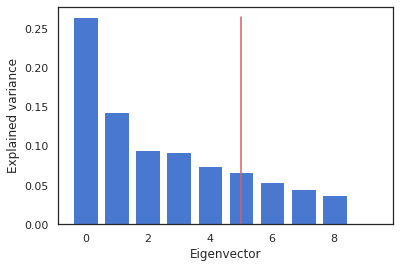

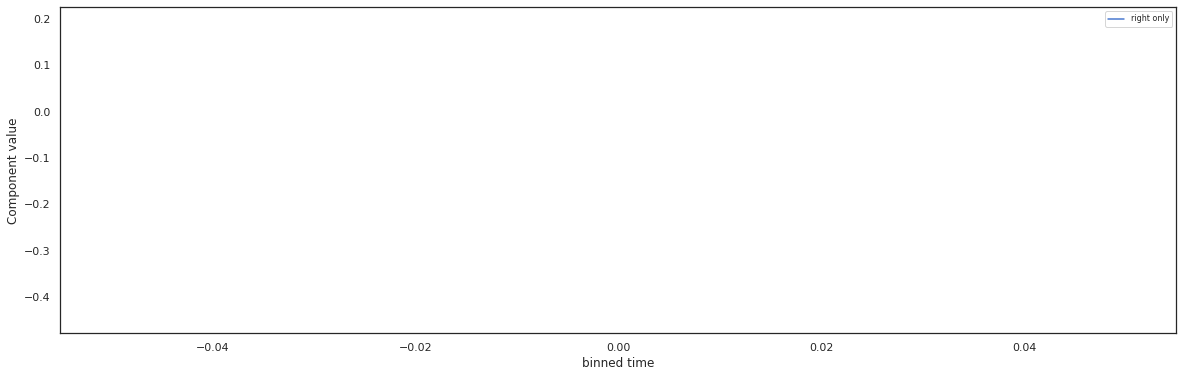

In [11]:
#neurons_PCA(first_session_filtered,0.1,50,130)

# General Linear Model 

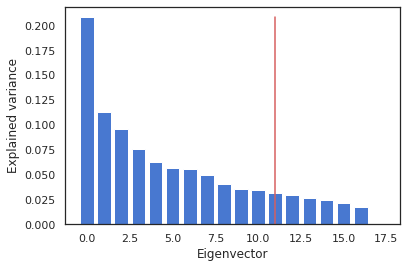

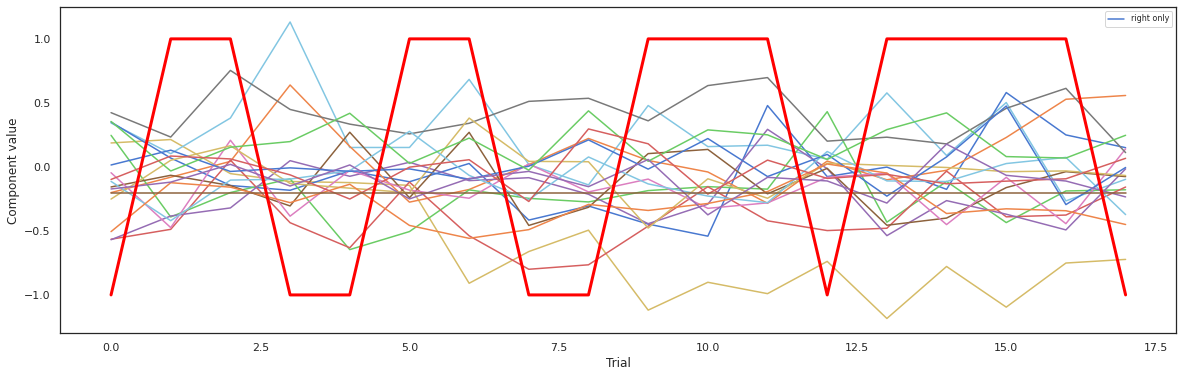

In [16]:
# session = 11
# filtered = filter_spikes(alldat,session)
# dat = neurons_PCA( filter_spikes(alldat,session),0.1,50,130)
# plt.plot(dat['PCs'].T)
# plt.xlabel('Trial')
# plt.ylabel('Component value')
# dat['PCs'].shape
# plt.plot(filter_spikes(alldat,session)['chcs'],linewidth=3,c='red')


0.29961069896918885
0.13164903431555125
0.07417121866755738
0.06230767170326638
0.05250084718322828


(18, 18)

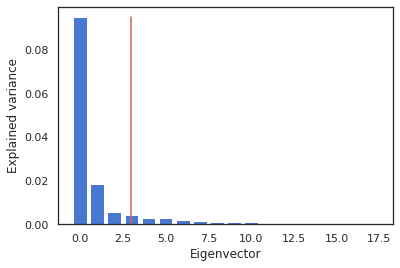

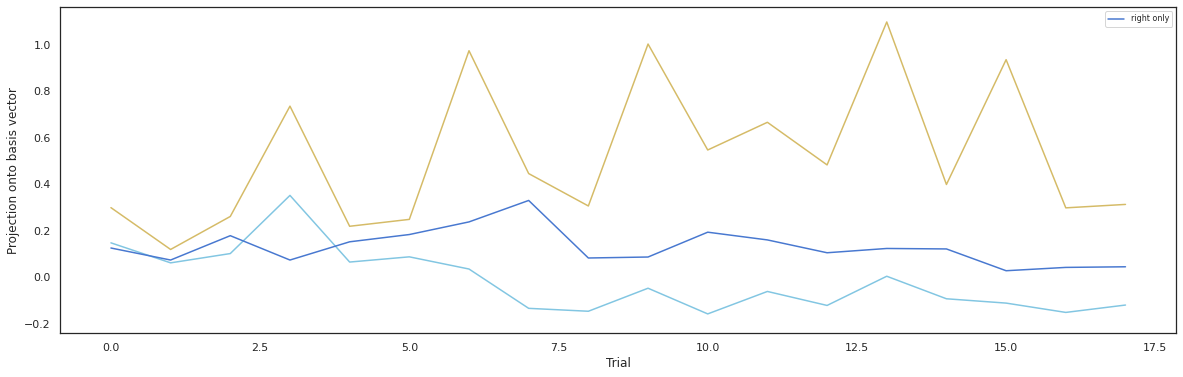

In [50]:
session = 11
filtered = filter_spikes(alldat,session,unfair_only=True,brain_area='VISp')
dat = neurons_PCA(filtered,0.1,50,130)
plt.plot(dat['PCs'][0,:])
plt.plot(dat['PCs'][1,:])
plt.plot(dat['PCs'][2,:])

print(np.std(dat['PCs'][0,:]))
print(np.std(dat['PCs'][1,:]))
print(np.std(dat['PCs'][2,:]))
print(np.std(dat['PCs'][3,:]))
print(np.std(dat['PCs'][4,:]))


plt.xlabel('Trial')
plt.ylabel('Projection onto basis vector')
dat['PCs'].shape

In [86]:

#print(dat['PCs'].shape)
#print(filtered['chcs'].shape)
    
# logreg = GLM_logistic(dat['PCs'].T, filtered['chcs'], pen = "l2", lambda_L2 = 1)
# plt.gca().set_xlabel('Feature')
# print(logreg.score(dat['PCs'].T, filtered['chcs']))

#from sklearn.linear_model import *
#logreg = LogisticRegressionCV(dat['PCs'].T, filtered['chcs'])

from sklearn.model_selection import *
#from sklearn import cross_validation

#accuracies = CV(LogisticRegression(penalty='l2'),dat['PCs'].T, filtered['chcs'], cv=5, verbose=1) # k=8 crossvalidation

#accuracies = cross_val_score(LogisticRegression(penalty='l2'),dat['PCs'].T, filtered['chcs'], cv=5, verbose=1) # k=8 crossvalidation
#print(accuracies)


<bound method BaseCrossValidator.split of LeaveOneOut()>


<StemContainer object of 3 artists>

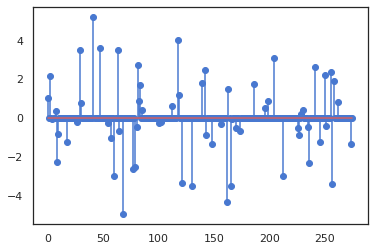

In [14]:
ax = plt.subplot()
ax.plot()
ax.stem(logreg.coef_.squeeze(), use_line_collection=True)


(3, 4)

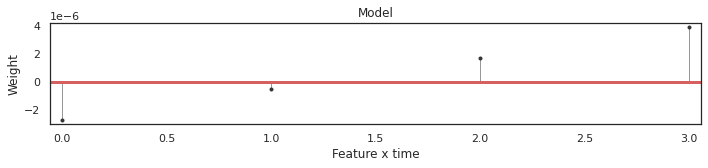

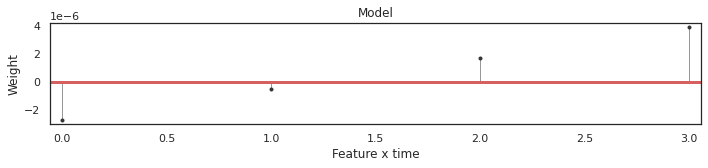

In [15]:
x = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9],[10, 11, 12]])
y = np.array([0, 1, 0])
logreg = GLM_logistic(x.T, y, pen = "l2", lambda_L2 = 1)
plot_weights({"Model":logreg})

x.T.shape